In [79]:
import pandas as pd 
 
passenger = pd.read_csv('AirPassengers.csv') 
passenger['Month'] = pd.to_datetime(passenger['Month'])  
passenger.sort_values(by=['Month'], inplace=True, ascending=True)

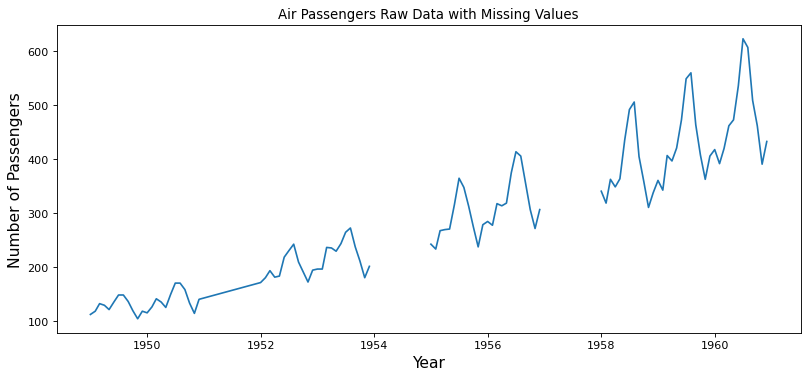

In [80]:
from matplotlib.pyplot import figure 
import matplotlib.pyplot as plt 
 
figure(figsize=(12, 5), dpi=80, linewidth=10) 
plt.plot(passenger['Month'] ,passenger['#Passengers']) 
plt.title('Air Passengers Raw Data with Missing Values') 
plt.xlabel('Year', fontsize=14) 
plt.ylabel('Number of Passengers', fontsize=14) 
plt.show()

In [75]:
print("\nMissing Values:\n", passenger.isnull().sum())



Missing Values:
 #Passengers              0
Linear                   0
Spline order 3           0
Normalized_Passengers    0
Lag_1                    0
Lag_2                    0
Time                     0
dtype: int64


In [8]:
passenger.fillna(passenger.mean(), inplace=True)


In [13]:
passenger.set_index('Month', inplace=True)


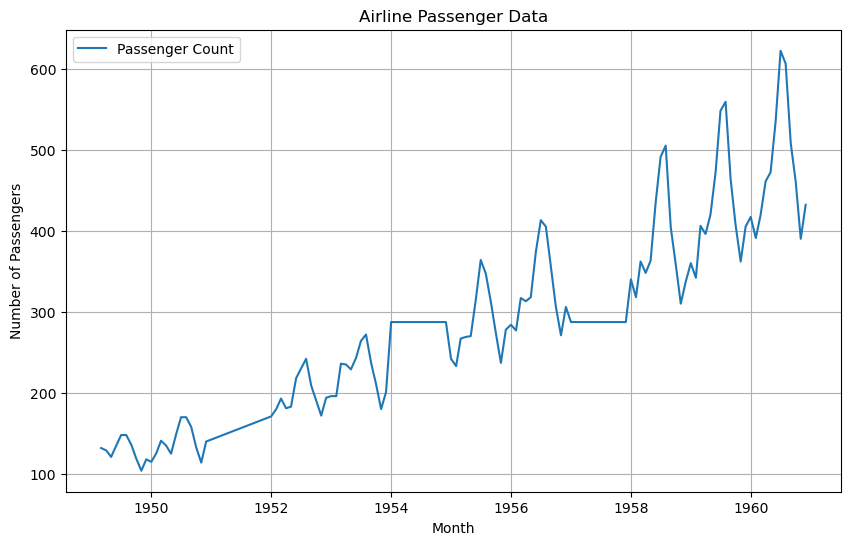

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(passenger.index, passenger['#Passengers'], label='Passenger Count')
plt.title('Airline Passenger Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
passenger['Normalized_Passengers'] = scaler.fit_transform(passenger[['#Passengers']])


In [20]:
print("\nNormalized Data:\n", passenger.head())


Normalized Data:
             #Passengers  Linear  Spline order 3  Normalized_Passengers
Month                                                                 
1949-01-01        112.0   112.0           112.0               0.015444
1949-02-01        118.0   118.0           118.0               0.027027
1949-03-01        132.0   132.0           132.0               0.054054
1949-04-01        129.0   129.0           129.0               0.048263
1949-05-01        121.0   121.0           121.0               0.032819


In [22]:
passenger.to_csv("cleaned_airline_passenger_data.csv")


In [25]:
passenger['Lag_1'] = passenger['#Passengers'].shift(1)
passenger['Lag_2'] = passenger['#Passengers'].shift(2)

In [27]:
passenger.dropna(inplace=True)


In [29]:
print("\nProcessed Data:\n", passenger.head())



Processed Data:
             #Passengers  Linear  Spline order 3  Normalized_Passengers  Lag_1  \
Month                                                                           
1949-03-01        132.0   132.0           132.0               0.054054  118.0   
1949-04-01        129.0   129.0           129.0               0.048263  132.0   
1949-05-01        121.0   121.0           121.0               0.032819  129.0   
1949-06-01        135.0   135.0           135.0               0.059846  121.0   
1949-07-01        148.0   148.0           148.0               0.084942  135.0   

            Lag_2  
Month              
1949-03-01  112.0  
1949-04-01  118.0  
1949-05-01  132.0  
1949-06-01  129.0  
1949-07-01  121.0  
